# Projek Akhir Dicoding
## Belajar Machine Learning Untuk Pemula


---
##### Nama: Rangga Wibisana Putra Pamungkas
---
Projek akhir dari Belajar Pengembangan Machine Learning ini adalah membuat sebuah model yang akan mengklasifikasikan dan mengenali gambar buah-buahan yang terdiri dari ['guava', 'cantaloupe', 'waterapple', 'pomelo', 'mango', 'bilimbi', 'orange', 'banana', 'coconut', 'pineapple', 'watermelon', 'papaya', 'melon']. Model ini dibuat dengan menggunakan program jaringan saraf tiruan dengan menggunakan library TensorFlow. Model yang telah dibuat kemudian disimpan dalam bentuk TFlite.

# Loading Dataset

In [1]:
# Menghubungkan Drive dengan Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
os.chdir('/content/drive/MyDrive/Kaggle')
!kaggle datasets download -d yudhaislamisulistya/plants-type-datasets

 99% 930M/937M [00:16<00:00, 78.0MB/s]
100% 937M/937M [00:16<00:00, 58.8MB/s]


In [3]:
os.chdir('/content')
!mkdir plants
!unzip -qq /content/drive/MyDrive/Kaggle/plants-type-datasets.zip  -d plants
!ls plants

split_ttv_dataset_type_of_plants


In [4]:
# mengecek directory dataset hasil dari ekstrak file
import os
os.listdir('/content/plants/split_ttv_dataset_type_of_plants')

['Test_Set_Folder', 'Train_Set_Folder', 'Validation_Set_Folder']

In [5]:
train_dir = os.path.join('/content/plants/split_ttv_dataset_type_of_plants/Train_Set_Folder')
os.listdir(train_dir)

['cucumber',
 'cassava',
 'guava',
 'cantaloupe',
 'sweet potatoes',
 'peper chili',
 'waterapple',
 'curcuma',
 'shallot',
 'eggplant',
 'pomelo',
 'aloevera',
 'paddy',
 'tobacco',
 'mango',
 'bilimbi',
 'orange',
 'banana',
 'coconut',
 'ginger',
 'pineapple',
 'galangal',
 'soybeans',
 'watermelon',
 'corn',
 'papaya',
 'spinach',
 'kale',
 'longbeans',
 'melon']

In [6]:
import shutil

ignore_plants = ['spinach', 'cassava', 'soybeans', 'cucumber', 'eggplant', 'peper chili', 'sweet potatoes', 'paddy', 'curcuma', 'tobacco', 'galangal', 'kale', 'corn', 'longbeans', 'ginger', 'aloevera', 'shallot']

for x in ignore_plants:
  path = os.path.join(train_dir, x)
  shutil.rmtree(path)

list_plants = os.listdir(train_dir)
print(list_plants)

['guava', 'cantaloupe', 'waterapple', 'pomelo', 'mango', 'bilimbi', 'orange', 'banana', 'coconut', 'pineapple', 'watermelon', 'papaya', 'melon']


# Data Preprocessing

In [7]:
from PIL import Image
total = 0

for x in list_plants:
  dir = os.path.join(train_dir, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

guava: 799
- (600, 400)
- (291, 173)
- (275, 183)
- (675, 450)
---------------
cantaloupe: 799
- (311, 162)
- (640, 640)
- (700, 393)
- (640, 640)
---------------
waterapple: 799
- (480, 240)
- (360, 360)
- (218, 231)
- (320, 320)
---------------
pomelo: 799
- (225, 225)
- (276, 183)
- (259, 194)
- (1140, 676)
---------------
mango: 799
- (626, 351)
- (260, 194)
- (500, 500)
- (276, 183)
---------------
bilimbi: 799
- (200, 159)
- (318, 159)
- (640, 360)
- (225, 225)
---------------
orange: 799
- (259, 194)
- (259, 194)
- (400, 300)
- (225, 225)
---------------
banana: 799
- (906, 604)
- (235, 214)
- (310, 163)
- (255, 198)
---------------
coconut: 799
- (200, 200)
- (600, 350)
- (300, 168)
- (227, 222)
---------------
pineapple: 799
- (207, 249)
- (225, 225)
- (365, 365)
- (256, 197)
---------------
watermelon: 799
- (251, 201)
- (250, 250)
- (358, 141)
- (251, 201)
---------------
papaya: 799
- (750, 432)
- (640, 640)
- (640, 640)
- (200, 200)
---------------
melon: 799
- (390, 280)


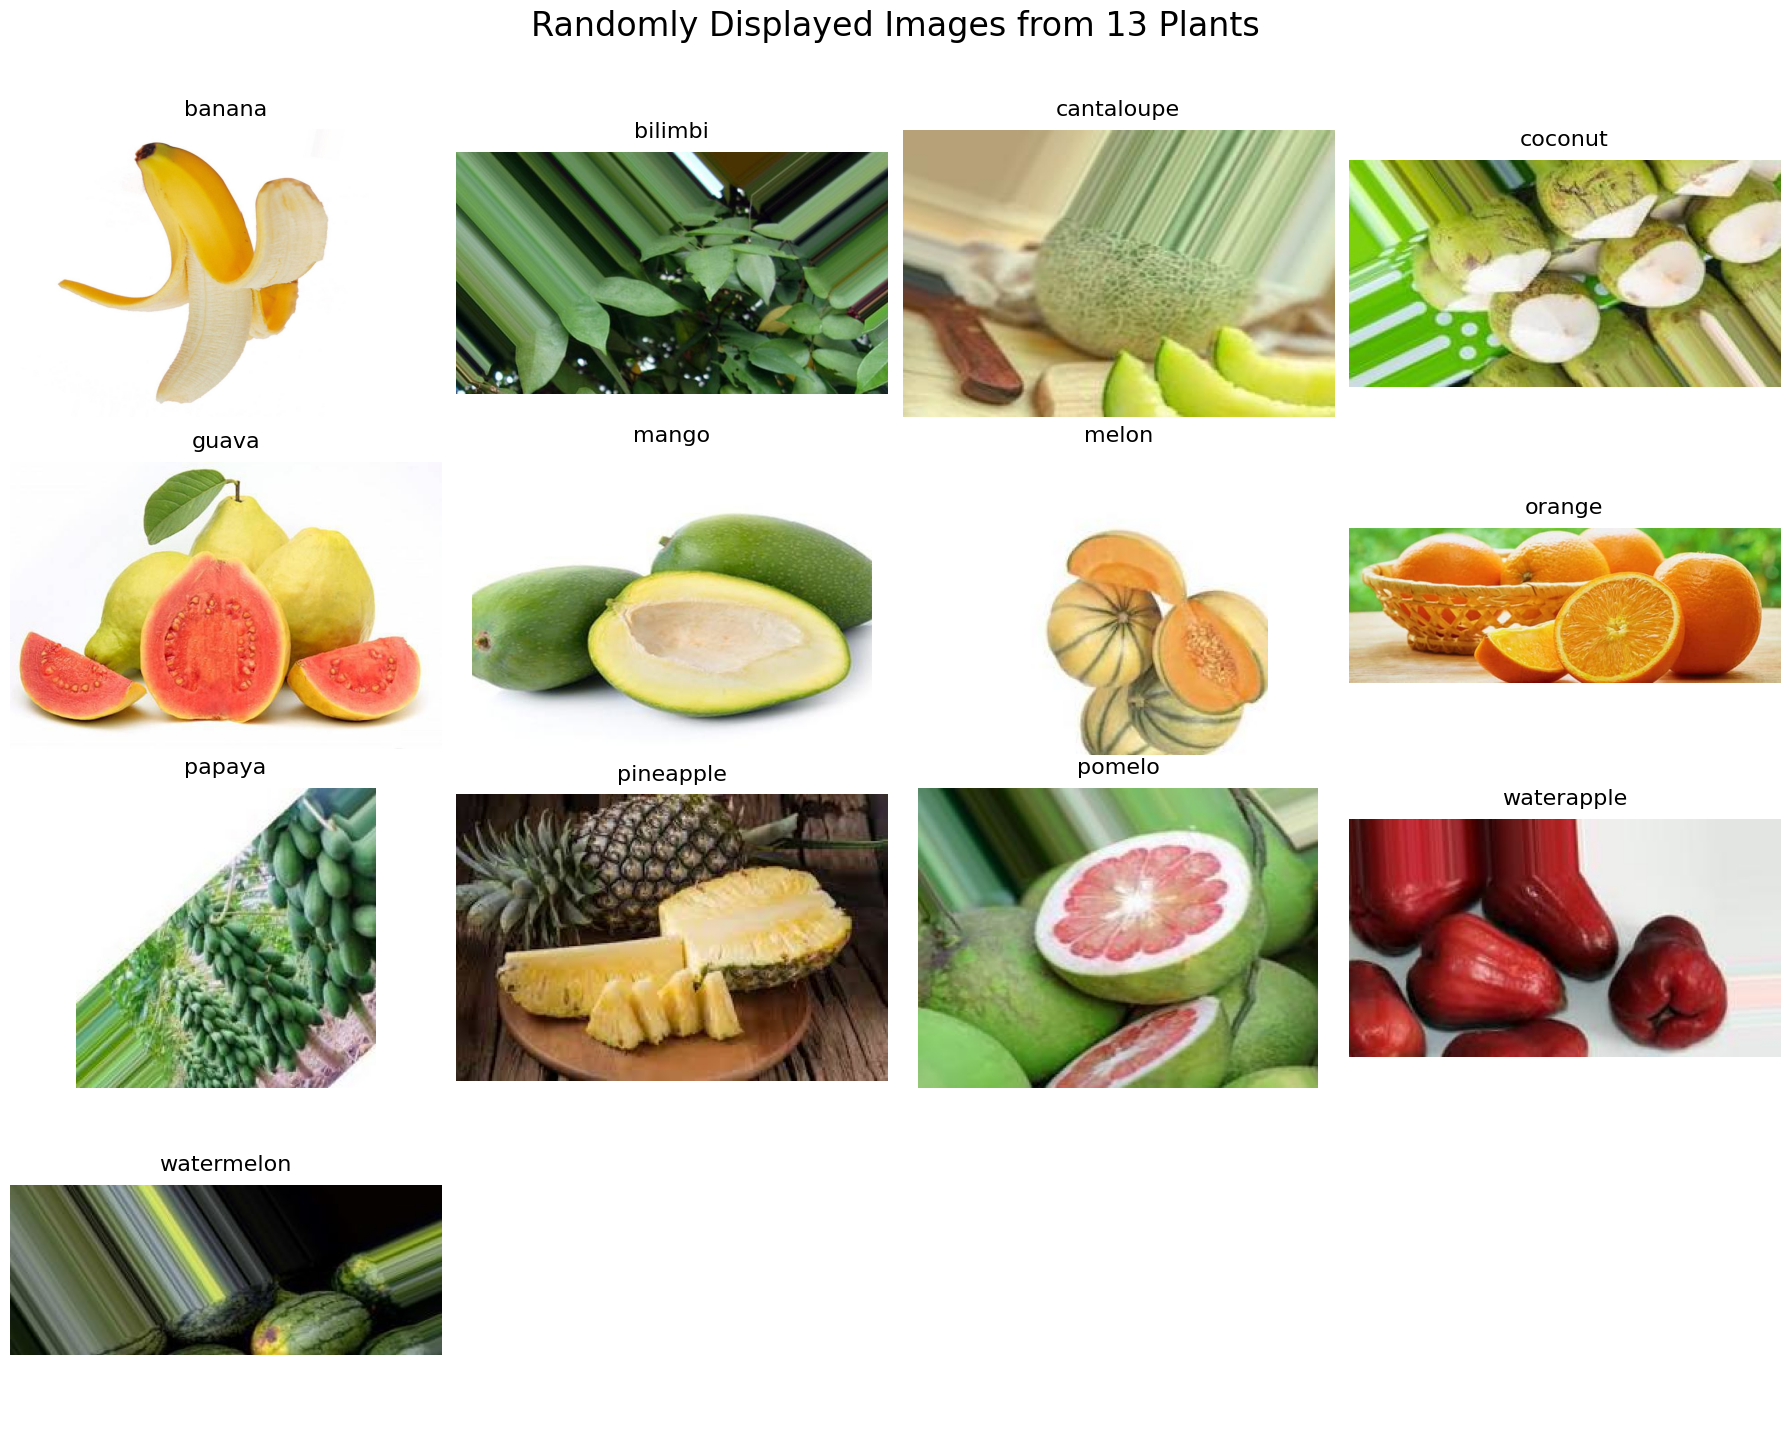

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the list of plants in 'list_plants'
plants_sorted = sorted(list_plants)

fig, ax = plt.subplots(4, 4, figsize=(18, 15))  # Create a 4x4 grid for 16 plots
fig.suptitle("Randomly Displayed Images from 13 Plants", fontsize=24)

# Iterate through plants and display random images
for i in range(4):
    for j in range(4):
        try:
            plant_selected = plants_sorted[i * 4 + j]  # Access plants in order
        except IndexError:  # Handle the last plant
            if i == 3 and j == 3:
                plant_selected = plants_sorted[-1]  # Get the last plant
            else:
                break

        if plant_selected == '.TEMP':
            continue

        plant_images = os.listdir(os.path.join(train_dir, plant_selected))
        random_image = np.random.choice(plant_images)
        img = plt.imread(os.path.join(train_dir, plant_selected, random_image))

        ax[i][j].imshow(img)
        ax[i][j].set_title(plant_selected, pad=10, fontsize=16)  # Adjust fontsize as needed
        ax[i][j].axis('off')  # Remove ticks for cleaner display

# Hide empty plots in the last row
for i in range(4):
    ax[3, i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing and title position
plt.show()

In [9]:
# data pre processing dengan image augmentation menggunakan ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,            # Apply shear transformations
    zoom_range=0.2,             # Randomly zoom in by up to 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='wrap',           # Fill in newly created pixels using the nearest-neighbor method
    validation_split=0.2        # Reserve 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Specify the path to your training dataset
    target_size=(150, 150),      # Resize images to the desired dimensions
    batch_size=256,               # Batch size for training
    class_mode='categorical',    # Use categorical labels for multi-class classification
    subset='training'            # Specify 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Specify the path to your training dataset
    target_size=(150, 150),      # Resize images to the desired dimensions
    batch_size=256,               # Batch size for validation
    class_mode='categorical',    # Use categorical labels for multi-class classification
    subset='validation'          # Specify 'validation' subset for validation data
)


Found 8320 images belonging to 13 classes.
Found 2067 images belonging to 13 classes.


# Building CNN Model

In [10]:
tf.device('/physical_device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
from keras.callbacks import ReduceLROnPlateau, Callback
# Callback untuk mengurangi learning rate jika tidak ada peningkatan pada akurasi
reduce_lr = ReduceLROnPlateau(
    monitor="accuracy",
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001,
)


# Custom callback untuk menghentikan pelatihan jika akurasi mencapai lebih dari 90%
class MyEarlyStop(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (logs.get('accuracy') >= 0.92 and logs.get('val_accuracy')>=0.92):
            print(
                '\nFor Epoch',
                epoch+1,
                '\nAccuracy has reached = %2.2f%%' % (logs['accuracy'] * 100),
                ', Val Accuracy = %2.2f%%' % (logs['val_accuracy'] * 100),
                ', training has been stopped.'
            )
            self.model.stop_training = True

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Model Training and Evaluation

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 256,
    epochs = 60,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 256,
    verbose = 1,
    callbacks=[reduce_lr, MyEarlyStop()])

Epoch 1/60
32/32 [==============================] - 121s 3s/step - loss: 2.2161 - accuracy: 0.2277 - val_loss: 1.8906 - val_accuracy: 0.3506 - lr: 0.0010
Epoch 2/60
32/32 [==============================] - 113s 4s/step - loss: 1.7626 - accuracy: 0.3886 - val_loss: 1.6037 - val_accuracy: 0.4604 - lr: 0.0010
Epoch 3/60
32/32 [==============================] - 95s 3s/step - loss: 1.5067 - accuracy: 0.4830 - val_loss: 1.5110 - val_accuracy: 0.4805 - lr: 0.0010
Epoch 4/60
32/32 [==============================] - 92s 3s/step - loss: 1.4066 - accuracy: 0.5169 - val_loss: 1.4835 - val_accuracy: 0.4990 - lr: 0.0010
Epoch 5/60
32/32 [==============================] - 95s 3s/step - loss: 1.3395 - accuracy: 0.5381 - val_loss: 1.3014 - val_accuracy: 0.5576 - lr: 0.0010
Epoch 6/60
32/32 [==============================] - 112s 4s/step - loss: 1.2780 - accuracy: 0.5649 - val_loss: 1.3266 - val_accuracy: 0.5464 - lr: 0.0010
Epoch 7/60
32/32 [==============================] - 93s 3s/step - loss: 1.2103 

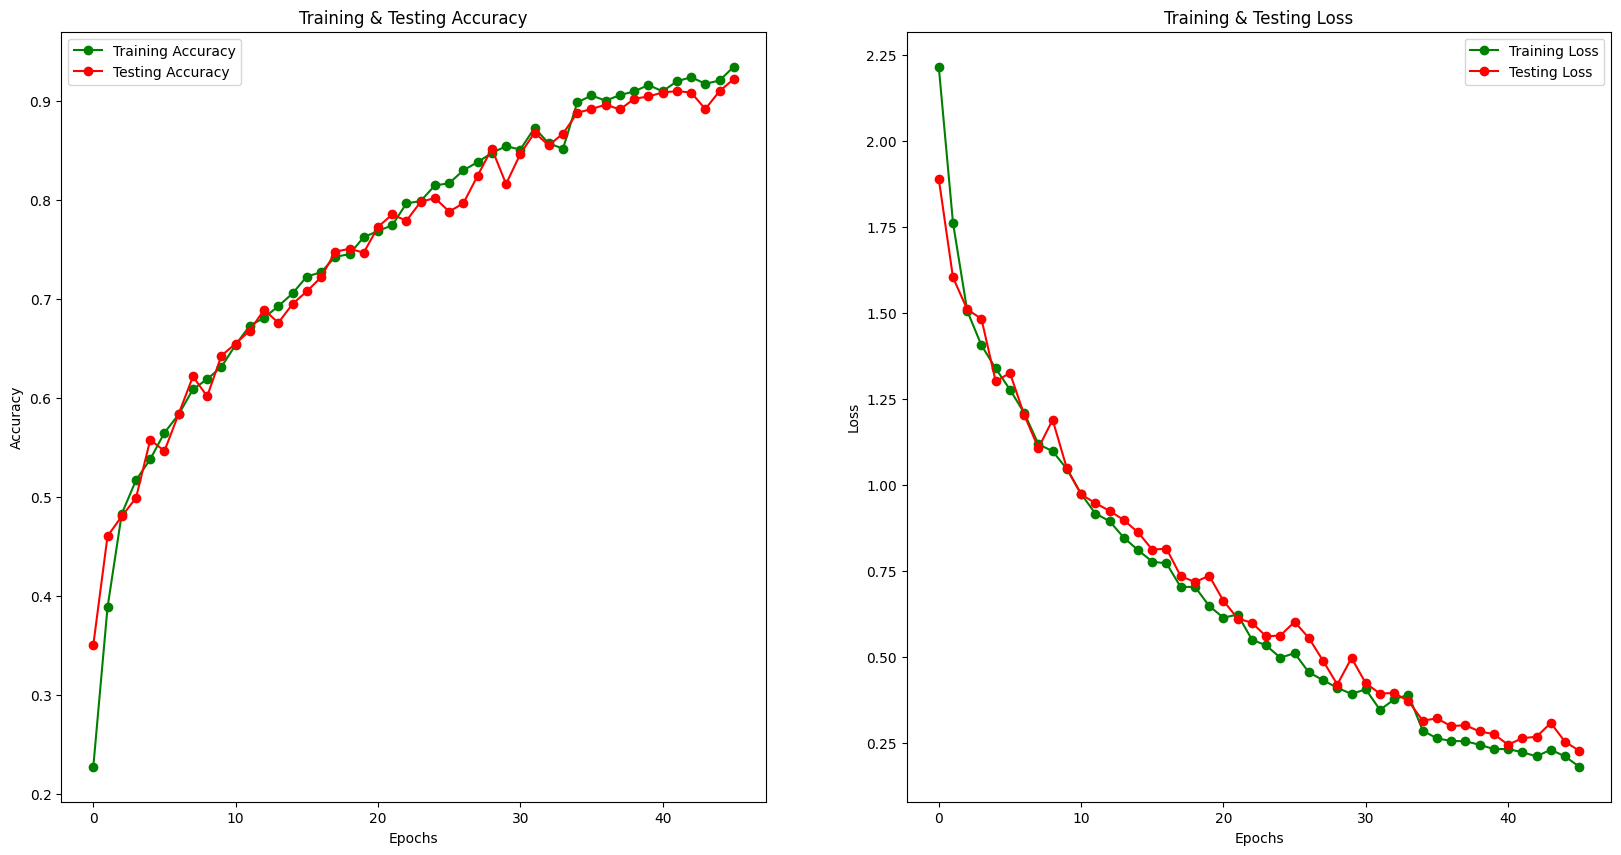

In [14]:
# Menampilkan plot accuracy dan loss
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

# Plot accuracy dan loss dari training
ax[0].plot(train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Plot accuracy dan loss dari testing
ax[1].plot(train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

# Saving Model

In [15]:
import pathlib
# Menyimpan model dalam format SavedModel
export_dir = '/content/drive/MyDrive/Kaggle/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('plants.tflite')
tflite_model_file.write_bytes(tflite_model)

13919228